In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('online_sales.csv')  

# 1.Import necessary libraries and read the provided dataset (online_sales.csv).


In [2]:
df.head()
df.sample (n=5) 

# 2. Check top 5 and random 5 samples of the dataframe.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141967,548533,21218,RED SPOTTY BISCUIT TIN,6,3/31/11 17:17,3.75,13883.0,United Kingdom
160289,550458,22383,LUNCH BAG SUKI DESIGN,1,4/18/11 13:13,4.13,NaN,United Kingdom
17884,537781,22554,PLASTERS IN TIN WOODLAND ANIMALS,2,12/8/10 12:46,1.65,17341.0,United Kingdom
211186,555349,22558,CLOTHES PEGS RETROSPOT PACK 24,5,6/2/11 12:08,1.65,16729.0,United Kingdom
38547,539586,22834,HAND WARMER BABUSHKA DESIGN,24,12/20/10 13:08,0.85,14298.0,United Kingdom


In [3]:
df.shape
df.dtypes 

#  3. Check info of the dataframe and write your observations. Comment on data 
# types and shape of the dataset. 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

There are 8 columns and 240007 rows which include the order details and customer details along with indexing. There are 5 categorical discrete data showing as 'object' while there are 3 numerical data.

In [18]:
df_1 = df.isnull().sum()

percentage_null = df.isnull().sum() * 100 / len(df)
# 4. Check for null values and report the percentage of null values of each column. 

df_dropNull = df.dropna()# drop the rows having null values in it. 
percentage_null



InvoiceNo       0.000000
StockCode       0.000000
Description     0.375406
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     28.009600
Country         0.000000
sales           0.000000
dtype: float64

In [5]:
df.describe().T 

# 5. for statistical summary

,count,mean,std,min,25%,50%,75%,max
Quantity,240007.0,9.277646,223.061608,-74215.0,1.00,3.0,10.00,74215.0
UnitPrice,240007.0,5.124265,119.992279,0.0,1.25,2.1,4.21,38970.0
CustomerID,172782.0,15274.819941,1725.093177,12346.0,13842.00,15132.0,16814.00,18287.0


In [6]:
df1 = df.drop(df[df.Quantity < 0].index)

# 6. Drop the instances having quantity less than zero. (1 point)

In [7]:
df4 = df.value_counts(['Country']) 
print(df4)

# 7. To get unique value counts of countries

df4 = df.value_counts(['Country']).index.tolist()[0]
print(df4)

# to get country with highest number of instances


Country             
United Kingdom          220279
Germany                   4208
France                    3642
EIRE                      3034
Spain                     1142
Netherlands               1142
Belgium                    933
Switzerland                708
Australia                  642
Portugal                   624
Norway                     378
Channel Islands            368
Cyprus                     353
Finland                    312
Italy                      309
Japan                      251
Sweden                     200
Hong Kong                  200
Poland                     187
Denmark                    184
Austria                    127
Singapore                  118
Iceland                    102
Greece                      85
Unspecified                 83
Canada                      68
Malta                       47
Lebanon                     45
Israel                      38
Lithuania                   35
European Community          32
Brazil            

In [8]:
df['sales'] = df['Quantity'] * df['UnitPrice']

# 8. Create a new column with the name as ‘sales’ having total sales. The total sales 
# is defined as Quantity*UnitPrice

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [10]:
df.groupby('Country').sales.sum().sort_values(ascending=False).head(5)

# 9. Top 5 countries in terms of sales.
# considering the size of sales. 

Country
United Kingdom    3572911.301
Netherlands        125721.310
Germany            103525.900
EIRE                99384.270
France              87442.880
Name: sales, dtype: float64

In [11]:
df.groupby('Country').sales.mean().sort_values(ascending=False).head(5)

# 9. Top 5 countries in terms of sales.
# Consider the mean value of sales.

Country
Australia      123.164003
Netherlands    110.088713
Japan           84.194183
Sweden          77.243900
Denmark         51.285652
Name: sales, dtype: float64

In [12]:
df5 = df
df5['InvoiceDate'] = pd.to_datetime(df5.InvoiceDate)
df5.dtypes
df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
sorted_sales = df.sort_values("sales", ascending=False)
new_df = sorted_sales.head()
new_df['StockCode']

# 10 Report the top 5 products which bring the highest sales. Use StockCode for 
# product information.

61619         23166
222680        22502
15017     AMAZONFEE
173382         POST
52711         21108
Name: StockCode, dtype: object

In [14]:
df.groupby(df['InvoiceDate'].dt.month)['sales'].sum().sort_values(ascending=False).head(1)

# 11. Convert the ‘InvoiceDate’ into a date format and report the month on which 
# the maximum sales occur?

InvoiceDate
12    748957.02
Name: sales, dtype: float64

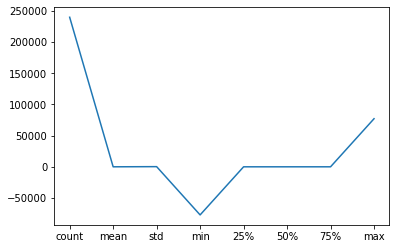

In [15]:
# statistical summary of sales
df['sales'].describe()
plt.plot(df['sales'].describe())